In [1]:
import numpy as np
# for vectorized math,arrays ftns etc
import copy

import matplotlib.pyplot as plt
# for displaying graphs/plots

from PIL import Image
# to load and resize .jpg images

import os
# for handling file paths

%matplotlib inline
# Ensures that plots (from plt) show inside Jupyter Notebook cells


In [56]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder_path, label, image_size):
    X = []
    Y = []

    if not os.path.exists(folder_path):
        print(f"❌ Folder does not exist: {folder_path}")
        return [], []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                X.append(np.array(img))
                Y.append(label)
            except Exception as e:
                print(f"❌ Error loading {img_path}: {e}")
    
    return X, Y

def load_dataset_seatbelt(base_dir="seatbelt_classification", image_size=(64, 64)):
    label_names = ["with_seatbelt", "without_seatbelt"]
    label_map = {name: i for i, name in enumerate(label_names)}

    X_train, Y_train = [], []
    X_test, Y_test = [], []

    for label_name in label_names:
        label = label_map[label_name]
        train_folder = os.path.join(base_dir, "train", label_name)
        test_folder = os.path.join(base_dir, "test", label_name)

        X_tr, Y_tr = load_images_from_folder(train_folder, label, image_size)
        X_te, Y_te = load_images_from_folder(test_folder, label, image_size)

        X_train.extend(X_tr)
        Y_train.extend(Y_tr)
        X_test.extend(X_te)
        Y_test.extend(Y_te)

    # Convert to numpy arrays
    X_train = np.array(X_train)
    Y_train = np.array(Y_train).reshape(1, -1)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test).reshape(1, -1)

    classes = np.array(label_names)

    return X_train, Y_train, X_test, Y_test, classes


In [57]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset_seatbelt()

In [4]:

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 1878
Number of testing examples: m_test = 602
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1878, 64, 64, 3)
train_set_y shape: (1, 1878)
test_set_x shape: (602, 64, 64, 3)
test_set_y shape: (1, 602)


In [5]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Check shapes
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))


train_set_x_flatten shape: (12288, 1878)
train_set_y shape: (1, 1878)
test_set_x_flatten shape: (12288, 602)
test_set_y shape: (1, 602)


In [6]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.


In [7]:


def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """


    s = 1 / (1+np.exp(-z))

    
    return s

In [8]:


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    

    w = np.zeros((dim,1))
    b = 0.0


    return w, b

In [9]:


def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation 

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    # computing activation
    # compute cost by using np.dot to perform multiplication. 
    # bot using loops (vectorization)

    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1/m * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)) )
    

    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = (1/m) * np.dot(X,((A - Y).T))
    db = (1/m) * np.sum(A - Y)

    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [10]:


def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if with_seatbelt, 1 if without_seatbelt), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    

    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        # Cost and gradient calculation 

        grads, cost = propagate(w,b,X,Y)

        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule

        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [11]:


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture

    A = sigmoid(np.dot(w.T,X) + b)
    
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
       
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    
    return Y_prediction

In [12]:


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train

    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
..
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "params"

    w = params["w"]
    b = params["b"]
    # Predict test/train set examples 

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [13]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.498458
Cost after iteration 200: 0.464048
Cost after iteration 300: 0.440909
Cost after iteration 400: 0.423017
Cost after iteration 500: 0.408332
Cost after iteration 600: 0.395843
Cost after iteration 700: 0.384956
Cost after iteration 800: 0.375288
Cost after iteration 900: 0.366580
Cost after iteration 1000: 0.358645
Cost after iteration 1100: 0.351348
Cost after iteration 1200: 0.344586
Cost after iteration 1300: 0.338281
Cost after iteration 1400: 0.332369
Cost after iteration 1500: 0.326801
Cost after iteration 1600: 0.321537
Cost after iteration 1700: 0.316543
Cost after iteration 1800: 0.311791
Cost after iteration 1900: 0.307257
train accuracy: 89.98935037273695 %
test accuracy: 84.88372093023256 %


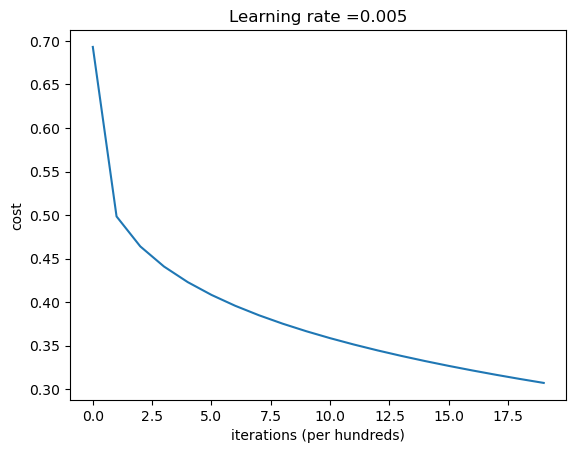

In [14]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()


Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



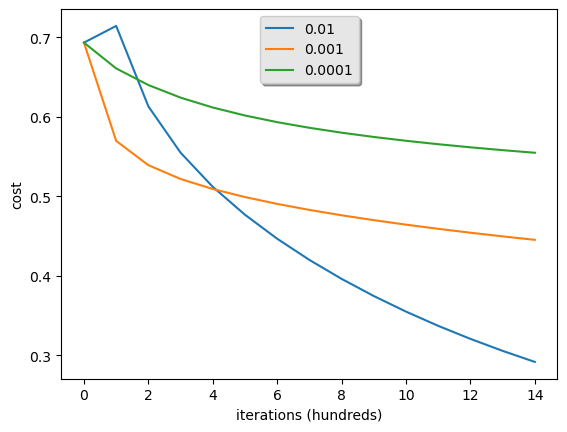

In [15]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
# learning rate controls how quickly we update our parameters w and b
# Choosing the right learning rate is critical — that’s why I plotted curves to see which one works best.
# (minimum cost):
#  Small learning rate → tiny steps → slow progress → takes many iterations to get there.
#  Large learning rate → big jumps → may reach faster, but could overshoot and jump past the valley.
#  Too large → unstable, cost jumps up/down, doesn't converge.

# in this case
# Learning Rate	Final Cost	Speed of Decrease	
# 0.01	Lowest	Fastest	 Best
# 0.005	Very low	Good	 Good
# 0.001	Higher	Slow	 Slow
# 0.0001	High	Very slow	 Too slow

# so my final choice would be 0.01

In [16]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.714170
Cost after iteration 200: 0.612999
Cost after iteration 300: 0.554753
Cost after iteration 400: 0.511768
Cost after iteration 500: 0.476667
Cost after iteration 600: 0.446502
Cost after iteration 700: 0.419871
Cost after iteration 800: 0.396007
Cost after iteration 900: 0.374436
Cost after iteration 1000: 0.354827
Cost after iteration 1100: 0.336932
Cost after iteration 1200: 0.320541
Cost after iteration 1300: 0.305471
Cost after iteration 1400: 0.291569
Cost after iteration 1500: 0.278719
Cost after iteration 1600: 0.266901
Cost after iteration 1700: 0.256336
Cost after iteration 1800: 0.247766
Cost after iteration 1900: 0.241835
train accuracy: 93.07774227902023 %
test accuracy: 85.21594684385383 %


Actual label (y): 0 → Seatbelt
Predicted label (ŷ): 0 → Seatbelt
Confidence: 94.49%


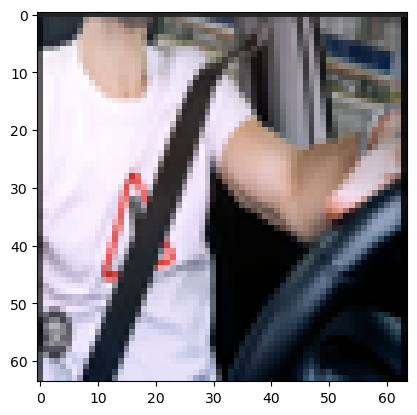

In [101]:
# Actual label of this test image (0 = Seatbelt, 1 = No Seatbelt)
actual_y = 0   # <-- change this manually for the image you're testing

# Change this to your test image file
my_image = "random.jpg"   

# Preprocess the image
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

# Predict using trained model
my_predicted_image = predict(logistic_regression_model["w"], 
                             logistic_regression_model["b"], 
                             image)

# Get predicted probability (confidence)
prob = sigmoid(np.dot(logistic_regression_model["w"].T, image) + 
               logistic_regression_model["b"])[0,0]

# Determine confidence relative to prediction
confidence = prob if my_predicted_image == 1 else 1 - prob

# Print results
print(f"Actual label (y): {actual_y} → {'Seatbelt' if actual_y == 0 else 'No Seatbelt'}")
print(f"Predicted label (ŷ): {int(np.squeeze(my_predicted_image))} → {'Seatbelt' if int(np.squeeze(my_predicted_image)) == 0 else 'No Seatbelt'}")
print(f"Confidence: {confidence*100:.2f}%")


Actual label (y): 1 → No Seatbelt
Predicted label (ŷ): 1 → No Seatbelt
Confidence: 75.18%


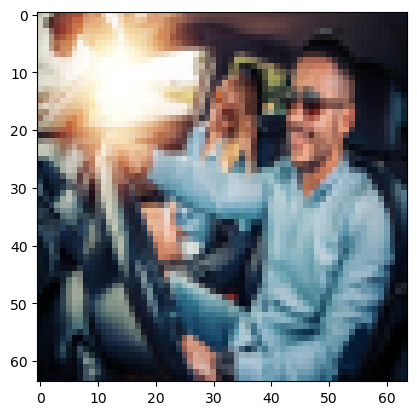

In [104]:
# Actual label of this test image (0 = Seatbelt, 1 = No Seatbelt)
actual_y = 1   

my_image = "peopledriving4_jpeg.rf.d97d5de15ea78281b91d995a199b38df.jpg"   

# Preprocess the image
fname = "seatbelt_classification/test/without_seatbelt/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

# Predict using trained model
my_predicted_image = predict(logistic_regression_model["w"], 
                             logistic_regression_model["b"], 
                             image)

# Get predicted probability (confidence)
prob = sigmoid(np.dot(logistic_regression_model["w"].T, image) + 
               logistic_regression_model["b"])[0,0]

# Determine confidence relative to prediction
confidence = prob if my_predicted_image == 1 else 1 - prob

# Print results
print(f"Actual label (y): {actual_y} → {'Seatbelt' if actual_y == 0 else 'No Seatbelt'}")
print(f"Predicted label (ŷ): {int(np.squeeze(my_predicted_image))} → {'Seatbelt' if int(np.squeeze(my_predicted_image)) == 0 else 'No Seatbelt'}")
print(f"Confidence: {confidence*100:.2f}%")


Actual label (y): 1 → No Seatbelt
Predicted label (ŷ): 1 → No Seatbelt
Confidence: 87.84%


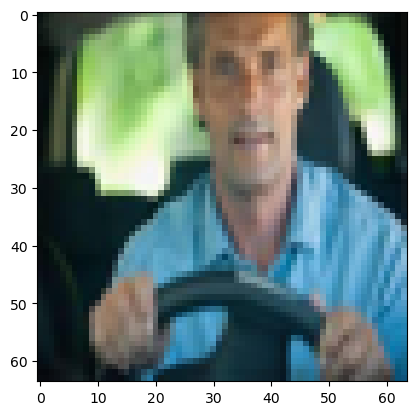

In [107]:
# Actual label of this test image (0 = Seatbelt, 1 = No Seatbelt)
actual_y = 1   
my_image = "66k_jpg.rf.280ff0b92fadcf9220239896e6fd1de4.jpg"   

# Preprocess the image
fname = "seatbelt_classification/test/without_seatbelt/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

# Predict using trained model
my_predicted_image = predict(logistic_regression_model["w"], 
                             logistic_regression_model["b"], 
                             image)

# Get predicted probability (confidence)
prob = sigmoid(np.dot(logistic_regression_model["w"].T, image) + 
               logistic_regression_model["b"])[0,0]

# Determine confidence relative to prediction
confidence = prob if my_predicted_image == 1 else 1 - prob

# Print results
print(f"Actual label (y): {actual_y} → {'Seatbelt' if actual_y == 0 else 'No Seatbelt'}")
print(f"Predicted label (ŷ): {int(np.squeeze(my_predicted_image))} → {'Seatbelt' if int(np.squeeze(my_predicted_image)) == 0 else 'No Seatbelt'}")
print(f"Confidence: {confidence*100:.2f}%")


Actual label (y): 0 → Seatbelt
Predicted label (ŷ): 0 → Seatbelt
Confidence: 99.55%


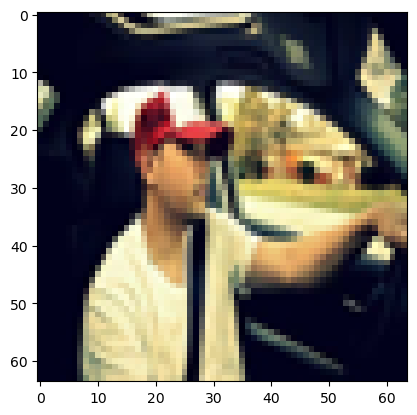

In [108]:
# Actual label of this test image (0 = Seatbelt, 1 = No Seatbelt)
actual_y = 0 

my_image = "FPZEUCA1GF0B.jpg"   

# Preprocess the image
fname = "seatbelt_classification/test/with_seatbelt/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

# Predict using trained model
my_predicted_image = predict(logistic_regression_model["w"], 
                             logistic_regression_model["b"], 
                             image)

# Get predicted probability (confidence)
prob = sigmoid(np.dot(logistic_regression_model["w"].T, image) + 
               logistic_regression_model["b"])[0,0]

# Determine confidence relative to prediction
confidence = prob if my_predicted_image == 1 else 1 - prob

# Print results
print(f"Actual label (y): {actual_y} → {'Seatbelt' if actual_y == 0 else 'No Seatbelt'}")
print(f"Predicted label (ŷ): {int(np.squeeze(my_predicted_image))} → {'Seatbelt' if int(np.squeeze(my_predicted_image)) == 0 else 'No Seatbelt'}")
print(f"Confidence: {confidence*100:.2f}%")
